<a href="https://colab.research.google.com/github/khadib12/HW2/blob/main/SupportVectorMachinesW25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from sklearn import svm
import pandas as pd
import numpy as np

C=1e+03 #1000
gamma=1e-05 #0.0001
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

In [26]:
import pandas as pd

# Verify the path first by checking the folder in your Google Drive
train = pd.read_csv('/content/drive/My Drive/DATA/diabetes_train.csv')  # Ensure this path is correct
test = pd.read_csv('/content/drive/My Drive/DATA/diabetes_test.csv')  # Ensure this path is correct

# Show the column names (first 8 columns)
print(train.columns[:8])


Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')


In [27]:
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative'], dtype=object)

In [28]:
from sklearn.metrics import confusion_matrix  # For evaluating model performance

# Ensure that the model is trained before making predictions
clf = clf.fit(train.iloc[:, 0:8], train.iloc[:, 8])  # Train the model on the training set

# Now, predict the labels for the test set
y_pred = clf.predict(test.iloc[:, 0:8])

# Get the true labels from the test set
y_true = test.iloc[:, 8]

# Generate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Output the confusion matrix components
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

# Calculate the accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.4f}")


True Negative (TN): 6
False Positive (FP): 1
False Negative (FN): 1
True Positive (TP): 2
Accuracy: 0.8000


In [35]:
# Hyperparameter tuning: Try different values for C and gamma
C_values = [1e+03, 1e+04, 1e+05]
gamma_values = [1e-05, 1e-06, 1e-07]

# Loop through each combination of C and gamma
best_accuracy = 0
best_params = {}
for c in C_values:
    for g in gamma_values:
        # Train model with current hyperparameters
        clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
        clf.fit(train.iloc[:, 0:8], train.iloc[:, 8])

        # Predict test set
        y_pred = clf.predict(test.iloc[:, 0:8])

        # Evaluate performance using confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        print(f"C: {c}, Gamma: {g}, Accuracy: {accuracy:.4f}")

        # Track the best accuracy and corresponding parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': c, 'gamma': g}

# Output the best parameters and accuracy
print(f"Best Parameters: {best_params}")


C: 1000.0, Gamma: 1e-05, Accuracy: 0.8000
C: 1000.0, Gamma: 1e-06, Accuracy: 0.9000
C: 1000.0, Gamma: 1e-07, Accuracy: 0.9000
C: 10000.0, Gamma: 1e-05, Accuracy: 0.8000
C: 10000.0, Gamma: 1e-06, Accuracy: 0.8000
C: 10000.0, Gamma: 1e-07, Accuracy: 0.9000
C: 100000.0, Gamma: 1e-05, Accuracy: 0.8000
C: 100000.0, Gamma: 1e-06, Accuracy: 0.9000
C: 100000.0, Gamma: 1e-07, Accuracy: 0.9000
Best Parameters: {'C': 1000.0, 'gamma': 1e-06}


In [38]:
from sklearn.metrics import confusion_matrix

# Define the hyperparameter ranges
C_values = [1e+03, 1e+04, 1e+05]
gamma_values = [1e-05, 1e-06, 1e-07]

# Initialize variables to store the best accuracy and parameters
best_accuracy = 0
best_params = {}

# Loop through different combinations of C and gamma
for c in C_values:
    for g in gamma_values:
        # Train the model with the current combination of C and gamma
        clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
        clf.fit(train.iloc[:, 0:8], train.iloc[:, 8])  # Train on training data

        # Make predictions on the test set
        y_pred = clf.predict(test.iloc[:, 0:8])

        # Get true labels for the test set
        y_true = test.iloc[:, 8]

        # Evaluate the model performance using confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        # Print the accuracy for the current combination of C and gamma
        print(f"C: {c}, Gamma: {g}, Accuracy: {accuracy:.4f}")

        # Track the best parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': c, 'gamma': g}

# Output the best parameters found
print(f"Best Parameters: {best_params}")



C: 1000.0, Gamma: 1e-05, Accuracy: 0.8000
C: 1000.0, Gamma: 1e-06, Accuracy: 0.9000
C: 1000.0, Gamma: 1e-07, Accuracy: 0.9000
C: 10000.0, Gamma: 1e-05, Accuracy: 0.8000
C: 10000.0, Gamma: 1e-06, Accuracy: 0.8000
C: 10000.0, Gamma: 1e-07, Accuracy: 0.9000
C: 100000.0, Gamma: 1e-05, Accuracy: 0.8000
C: 100000.0, Gamma: 1e-06, Accuracy: 0.9000
C: 100000.0, Gamma: 1e-07, Accuracy: 0.9000
Best Parameters: {'C': 1000.0, 'gamma': 1e-06}


False Positive Rate: [0.         0.         0.         0.28571429 0.28571429 1.        ]
True Positive Rate: [0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
Thresholds: [       inf 0.88021161 0.87546022 0.33837841 0.2822256  0.11044333]
AUC: 0.9048


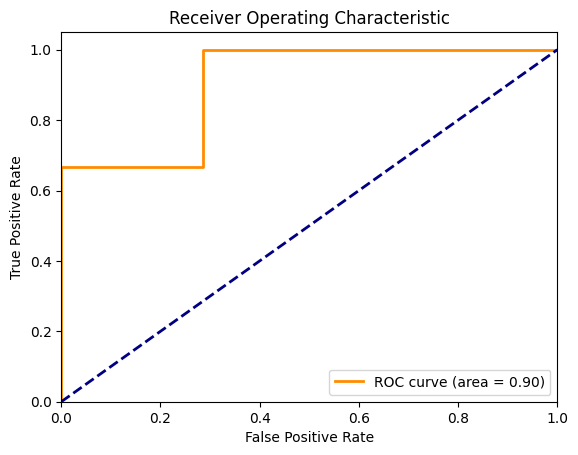

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert 'tested_negative' and 'tested_positive' to 0 and 1
y_true = test.iloc[:, 8].map({'tested_negative': 0, 'tested_positive': 1})

# Ensure the model is trained before calculating the ROC curve
# Use the best parameters from hyperparameter tuning (make sure best_params is already defined)
clf = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf', probability=True)
clf.fit(train.iloc[:, 0:8], train.iloc[:, 8])

# Predict probabilities for the test set (probabilities for both classes)
scores = clf.predict_proba(test.iloc[:, 0:8])

# Calculate the ROC curve using true labels and predicted probabilities for the positive class (scores[:, 1])
fpr, tpr, thresholds = roc_curve(y_true, scores[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Print ROC curve data
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")
print(f"Thresholds: {thresholds}")
print(f"AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

